In [12]:
from IPython.display import HTML
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
from pylab import *

In [ ]:
#%%javascript
#IPython.load_extensions('IPython-notebook-extensions-3.x/usability/hide_input_all');

In [9]:
from IPython.core.display import HTML
from IPython.core.display import Image 
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

#"What the heck are you going to do with all of that data?"

###UWC Dover Data Analysis Roadmap

###May 12, 2015



###1. What is a REST API?
###2. Management and basic dashboard visualization
###3. Data for occupants and visitors
###4. Data for researchers and technicians

## What is a REST API?

### Let's look at the world's most common API: Twitter

![alt text][2]

  [2]: ./twitterapi.png

####First, we need to let twitter know who we are (Authentication)

In [11]:
import twitter
def oauth_login():
    CONSUMER_KEY = 'WqnZAyAxATaBPcvBiDnLbISen'
    CONSUMER_SECRET = 'yOsSbDCJ6hwcDqewUWPFqjZm5vfOxrRwdWRs4LrXP7friWkVvX'
    OAUTH_TOKEN = '16507031-V8WD185o9nxIf2Gk5I6OmIxfCGz4rLYjD11d9Rp1L'
    OAUTH_TOKEN_SECRET = 'yFgHgiVfJhOH0Tv0adudffEiA2TgQ9XRlJ0OVjo19ZaWq'
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api
twitter_api = oauth_login()    
print twitter_api

From: http://nbviewer.ipython.org/github/furukama/Mining-the-Social-Web-2nd-Edition/blob/master/ipynb/Chapter%209%20-%20Twitter%20Cookbook.ipynb]

And: http://nbviewer.ipython.org/github/furukama/Mining-the-Social-Web-2nd-Edition/blob/master/ipynb/__Chapter%201%20-%20Mining%20Twitter%20%28Full-Text%20Sampler%29.ipynb

####Now, we create a script to query the API to find what are the latest trends

In [13]:
import json
import twitter
def twitter_trends(twitter_api, woe_id):
    return twitter_api.trends.place(_id=woe_id)
twitter_api = oauth_login()
WORLD_WOE_ID = 1
world_trends = twitter_trends(twitter_api, WORLD_WOE_ID)
print json.dumps(world_trends, indent=1)

[
 {
  "created_at": "2015-05-12T05:13:27Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=Tinelli", 
    "query": "Tinelli", 
    "name": "Tinelli", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23HipsterCrimes", 
    "query": "%23HipsterCrimes", 
    "name": "#HipsterCrimes", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23LasChicasOdian", 
    "query": "%23LasChicasOdian", 
    "name": "#LasChicasOdian", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23AmoTwitterPq", 
    "query": "%23AmoTwitterPq", 
    "name": "#AmoTwitterPq", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=Lali", 
    "query": "Lali", 
    "name": "Lali", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23NoPuedoVivirSin", 
    "query": "%23NoPuedoVivirSin", 
    "name": "#NoPuedoVivirSin", 
    "promoted_content": null
   }

####Now, let's make a query to find the most recent 100 tweets with a certain hashtag

In [14]:
q = '#HipsterCrimes' 
count = 500
search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']
# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        break
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
# Show one sample search result by slicing the list...
print json.dumps(statuses[0:5], indent=1)

[
 {
  "contributors": null, 
  "truncated": false, 
  "text": "Adopting children in your own country instead of adopting from a third world country. #HipsterCrimes @midnight @lootcrate", 
  "in_reply_to_status_id": null, 
  "id": 597993566879657984, 
  "favorite_count": 0, 
  "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>", 
  "retweeted": false, 
  "coordinates": null, 
  "entities": {
   "symbols": [], 
   "user_mentions": [
    {
     "id": 1418745782, 
     "indices": [
      101, 
      110
     ], 
     "id_str": "1418745782", 
     "screen_name": "midnight", 
     "name": "@midnight"
    }, 
    {
     "id": 709226545, 
     "indices": [
      111, 
      121
     ], 
     "id_str": "709226545", 
     "screen_name": "lootcrate", 
     "name": "Loot Crate"
    }
   ], 
   "hashtags": [
    {
     "indices": [
      86, 
      100
     ], 
     "text": "HipsterCrimes"
    }
   ], 
   "urls": []
  }, 
  "in_reply_to_screen_name": null, 
  "in_rep

####We can do cool things with this data like dissect statuses, screen names, etc

In [15]:
status_texts = [ status['text'] 
                 for status in statuses ]
screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]
words = [ w for t in status_texts 
              for w in t.split() ]
print "A few tweets!:" + json.dumps(status_texts[0:5], indent=1)
print "A few tweeters!:" + json.dumps(screen_names[0:5], indent=1) 
print "A few hastags!:" + json.dumps(hashtags[0:5], indent=1)
print "A few words used!:" + json.dumps(words[0:5], indent=1)

A few tweets!:[
 "Adopting children in your own country instead of adopting from a third world country. #HipsterCrimes @midnight @lootcrate", 
 "Birkenstalking #HipsterCrimes", 
 "\u201c@LAScanner: LOS FELIZ: Find me a MORE HIPSTER crime than a hobo \"using a wooden washboard\" to fight. LAPD enrte.\u201d #HipsterCrimes @midnight", 
 "Giving the barista your real name. #HipsterCrimes @midnight", 
 "Of course they take part with anything illegal because it's part of \"the scene\" these days. #HipsterCrimes #Scenesters @midnight"
]
A few tweeters!:[
 "midnight", 
 "lootcrate", 
 "LAScanner", 
 "midnight", 
 "midnight"
]
A few hastags!:[
 "HipsterCrimes", 
 "HipsterCrimes", 
 "HipsterCrimes", 
 "HipsterCrimes", 
 "HipsterCrimes"
]
A few words used!:[
 "Adopting", 
 "children", 
 "in", 
 "your", 
 "own"
]


####And count the frequency that words are used in the tweets

In [16]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10]
    print

[(u'#HipsterCrimes', 188), (u'@midnight', 140), (u'RT', 50), (u'a', 40), (u'of', 30), (u'the', 29), (u'in', 23), (u'to', 21), (u'your', 21), (u'and', 19)]

[(u'midnight', 143), (u'DeCample', 8), (u'lootcrate', 2), (u'taygogo', 2), (u'BadRonen', 2), (u'Letti4U', 2), (u'axetothemax', 2), (u'tonyposnanski', 2), (u'awasmoen', 1), (u'SinCityChiGirl', 1)]

[(u'HipsterCrimes', 192), (u'hipstercrimes', 8), (u'qutblf', 2), (u'paec', 2), (u'usudecides', 2), (u'DCFC', 1), (u'pot', 1), (u'Scenesters', 1), (u'Repent', 1), (u'UnhipHipster', 1)]



####And make plots from the data

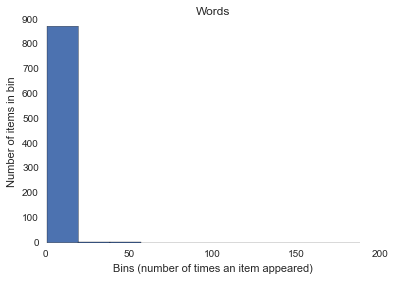

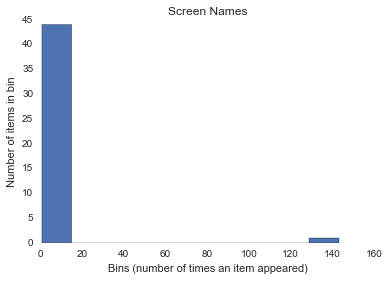

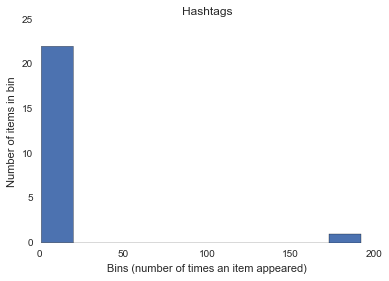

In [17]:
word_counts = sorted(Counter(words), reverse=True)
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):
    c = Counter(data)
    plt.hist(c.values())
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    plt.figure();

#Management and Basic Visualization of Data

###Overall Data System Diagram

[![Schematic][2]][1]

  [1]: https://docs.google.com/drawings/d/1CrJRuq6oyJ1jgT-zPkIt2ZfEXT1a-p_c8-ftZ_6_rbY/edit?usp=sharing
  [2]: ./3for2_Level3.png

##Data Management Options

- Where do we put all of the data when we stream it out of the REST API?

- We need speed and accessibility

###Databases designed specifically for time-series data

[![iobeam][2]][1]

  [1]: http://influxdb.com/
  [2]: ./influxdb-light400.png

###Open-source time-series data platform (by SoundCloud)

[![Prometheus][2]][1]

  [1]: http://prometheus.io/
  [2]: ./prometheus.png

###Princeton Startup

[![alt text][2]][1]

  [1]: http://www.cs.princeton.edu/~mfreed/
  [2]: ./iobeam.png

##Basic Raw Dashboard

- A simple interface to navigate the raw data collection

- Completely customizable and user friendly

###Open-source dashboarding platform

[![Grafana][2]][1]

  [1]: http://grafana.org/
  [2]: ./grafana.png
  

#Data for Occupants and Visitors

- Very simple, fun visualizations for visitors and occupants

- Telling the 3for2 Story!

###Interactive Storytelling Example

[![Interactive Storytelling][2]][1]
  [1]: http://www.nytimes.com/newsgraphics/2013/12/30/year-in-interactive-storytelling/
  [2]: ./interactive.png

###Interactive Storytelling Example

[![Google][2]][1]
  [1]: https://www.google.com/culturalinstitute/exhibit/the-second-world-war-in-100-items/5QJC6kUuV0xCKw?projectId=second-world-war&position=0%3A0
  [2]: ./secondworldwar.png

###Interactive Storytelling Example

[![GreenHoney][2]][1]
  [1]: http://muyueh.com/greenhoney/
  [2]: ./greenhoney.png

###An Open Source JavaScript Platform for Interactive Storyingtelling

[![Stack][2]][1]
  [1]: http://mbostock.github.io/stack/
  [2]: ./stack.png

#Data for Research and Technical Operations Analysis

- Visual Analytics Prototypes

- Meter Disaggregation

- Internet of Things (IoT) supplemental data 

##Visual Information Seeking Mantra

Overview First -  Gain an overview of the entire collection. 

Zoom and Filter -  Zoom in on items of interest and Filter out unimportant information

Details on Demand - Select and item and get more detailed information when needed

##Overview First -- Campus Level

[![Princeton][2]][1]
  [1]: http://52.1.224.93/
  [2]: ./princetoncampus.png

- Princeton: http://52.1.224.93/
- Find what's important
- Screening Paper
- DayFilter Paper
- Kale Platform

##Overview First - Building Systems Level

![systems][2]

  [2]: ./systems.png

###Systems Hierarchy Visualization Prototypes

In [ ]:
HTML('<iframe src=http://clayton-lightning.herokuapp.com/visualizations/26/iframe/ width=700 height=500></iframe>')

###Research in pattern recognition

![alt text][2]

  [2]: ./dayfilter.png

###Pattern recognition to find 'interesting' behaviour

![alt text][2]

  [2]: ./DiscordSankeyExampleWithHeatmapV2.png

###Application on whole buidling

![alt text][2]

  [2]: ./dayfilter_whole.png

In [ ]:
HTML('<iframe src=http://clayton-lightning.herokuapp.com/visualizations/35/iframe/ width=700 height=500></iframe>')

##Zoom and Filter

- Intermediate level of detail to zoom in and identify interesting behaviour

###Using heatmaps and filtering techniques to identify what is important

![alt text][2]

  [2]: ./forensicpaper.png

###Heatmaps

![Heatmaps][2]

  [2]: ./heatmap3.png


[![cal-heatmap][2]][1]
  [1]: https://kamisama.github.io/cal-heatmap/
  [2]: ./cal-heatmap.png

##Details on Demand

In [ ]:
HTML('<iframe src=http://clayton-lightning.herokuapp.com/visualizations/37/iframe/ width=700 height=500></iframe>')

##Meter Disaggregation - decomposing a single power meter into 'virtual' submeters

[![alt text][2]][1]

  [1]: https://github.com/nilmtk/nilmtk
  [2]: ./nilmtk.png

###Internet of Things (IoT) Temporary Data Systems

[![alt text][2]][1]

  [1]: http://chaos.princeton.edu/ongoing-projects/side-projects/
  [2]: ./hackingsustainability.png

###Internet of Things (IoT) Temporary Data Systems

[![alt text][2]][1]

  [1]: https://www.spark.io/
  [2]: ./sparkcore.png

#Questions?